In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.constants import c
import scipy.integrate
from scipy.optimize import curve_fit
from astropy import units as u

In [2]:
Outside_the_atmosphere = pd.read_csv("spectrum.dat",
                       sep="(?<!#)\s+",header=13, encoding='ascii', engine='python')

Outside_the_atmosphere.columns = ['Wavelength, nm', 'Flux density, SI', 'Itegrated']
wavelengths_outside = np.array(Outside_the_atmosphere['Wavelength, nm'])[4932:15727]
flux_densities_outside = np.array(Outside_the_atmosphere['Flux density, SI'])[4932:15727]

s = np.size(flux_densities_outside)
for i in range(s):
    flux_densities_outside[i] = float(flux_densities_outside[i])

In [3]:
Clouds = pd.read_excel('clouds.xlsx')
Clouds.columns = ['Wavelength, nm', 'Flux density, SI']

wavelengths_clouds = np.array(Clouds['Wavelength, nm'])[:-1]
flux_densities_clouds = np.array(Clouds['Flux density, SI'])[:-1]

s = np.size(wavelengths_clouds)
for i in range(s):
    wavelengths_clouds[i] = float(wavelengths_clouds[i])
    flux_densities_clouds[i] = float(flux_densities_clouds[i])/10000

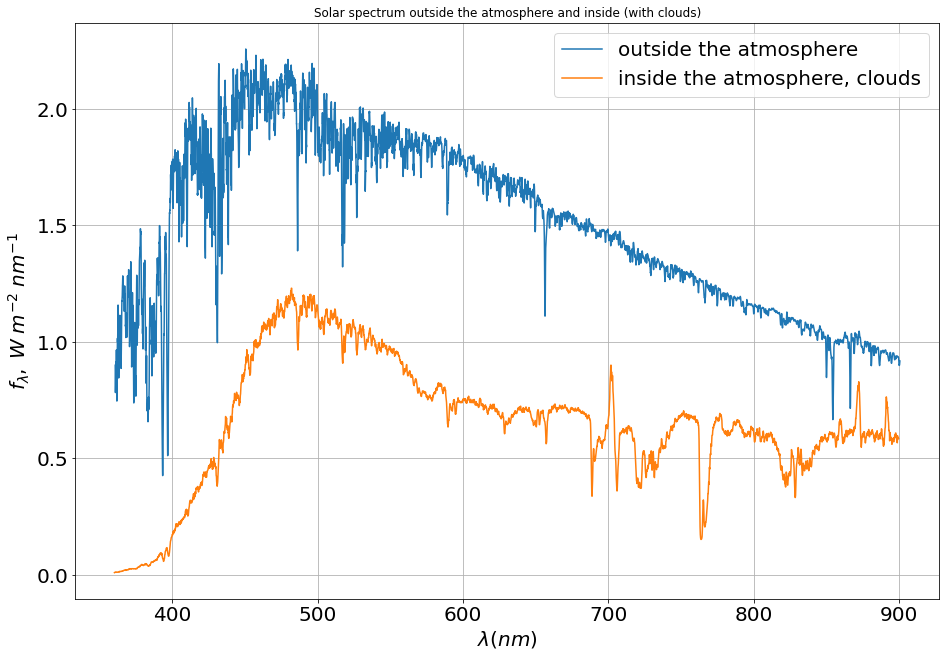

In [4]:
ax = plt.axes([0, 0, 2, 2])
ax.plot(wavelengths_outside, flux_densities_outside, label = 'outside the atmosphere')
ax.plot(wavelengths_clouds, flux_densities_clouds, label = 'inside the atmosphere, clouds')
ax.grid(True)
fontsize = 20
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel(r'$f_{\lambda}, \; W \; m^{-2} \; nm^{-1}$', fontsize = fontsize)
plt.xlabel(r'$\lambda(nm)$', fontsize = fontsize)
#plt.xlim(888,895)
#plt.ylim(0.3, 0.7)
plt.title('Solar spectrum outside the atmosphere and inside (with clouds)')
plt.savefig('Solar spectrum comparison.png')
plt.legend(fontsize = fontsize)
plt.show()

# solar spectra

[  1.58344423 393.47581059   0.67468697   1.4283332 ]


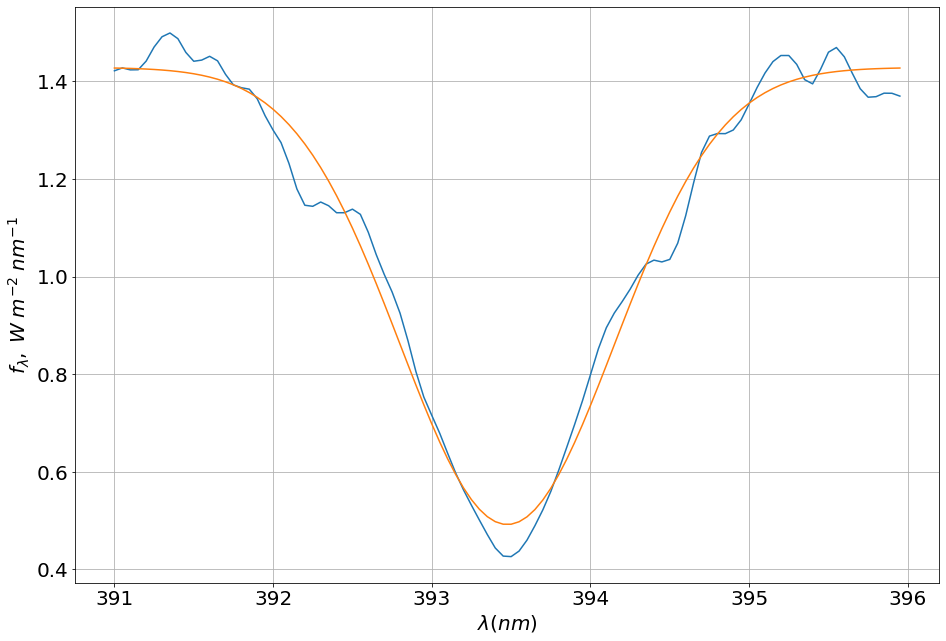

[  1.36354106 396.92760519   0.54539838   1.54208167]


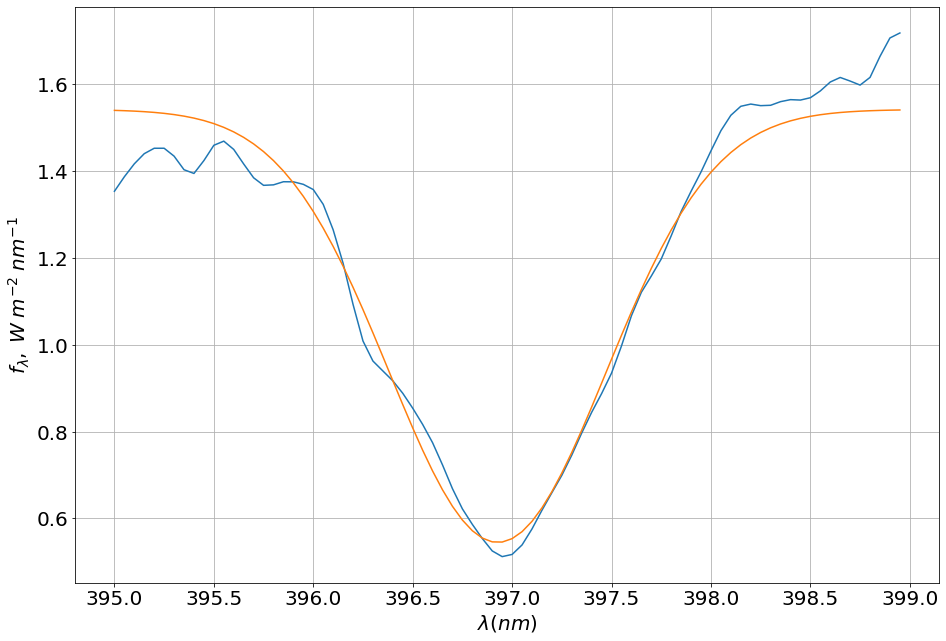

[  0.81639378 430.66875583   0.55653561   1.67502691]


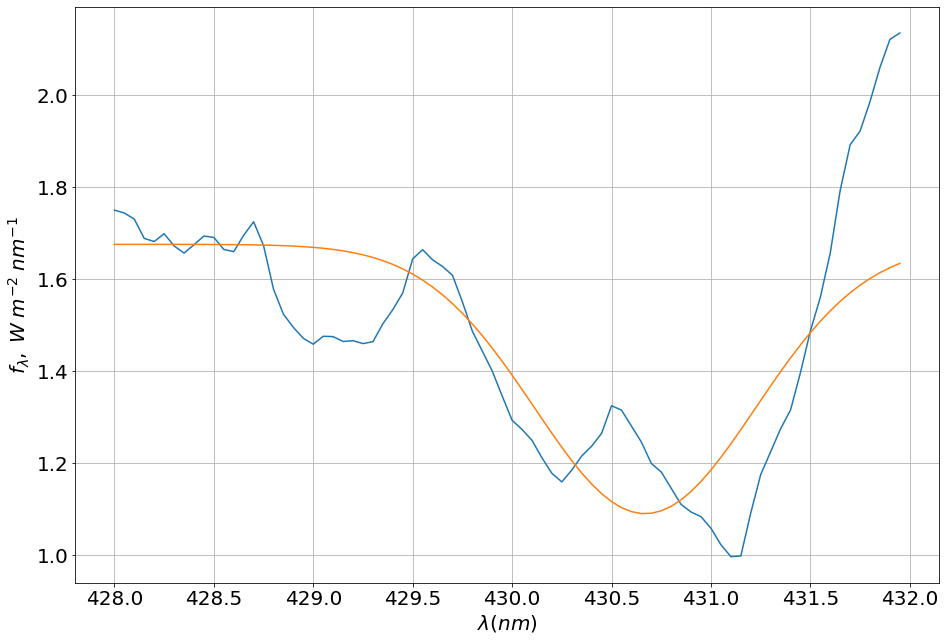

[3.28569047e-01 4.86279364e+02 2.44100893e-01 1.93040358e+00]


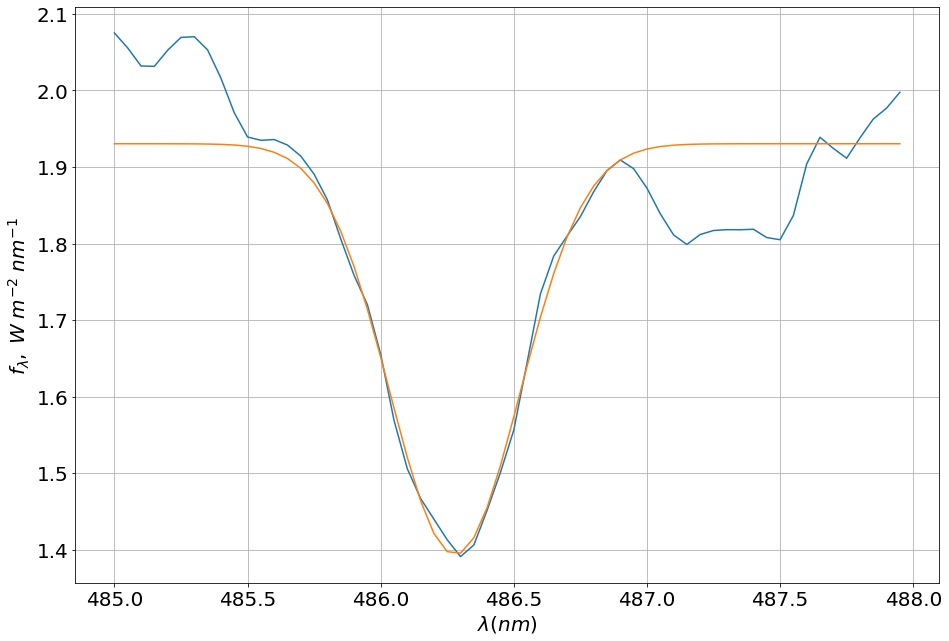

[5.08207997e-01 5.17153162e+02 3.57079366e-01 1.88493676e+00]


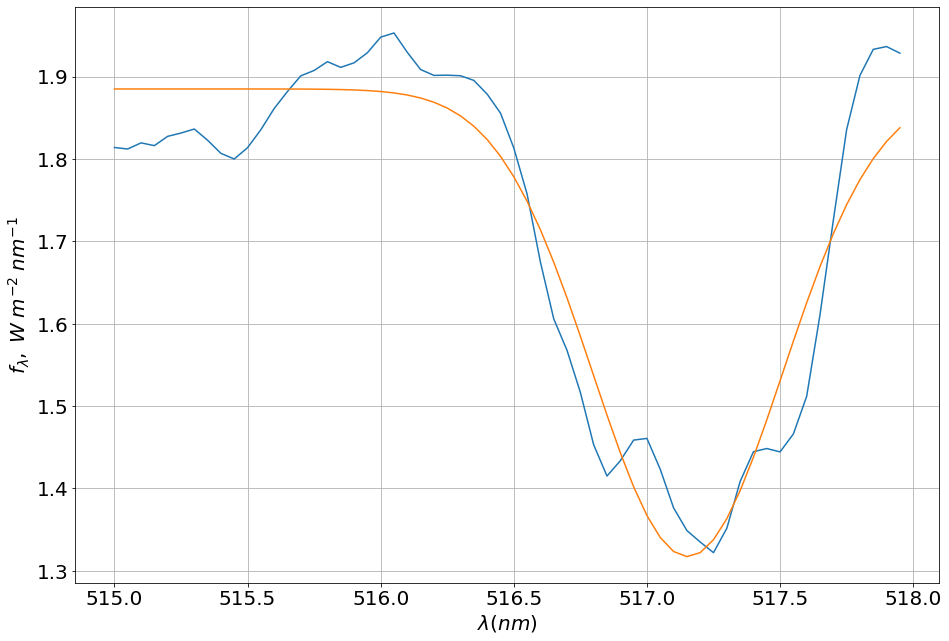

[2.91267654e-01 5.89501510e+02 4.28294321e-01 1.82121370e+00]


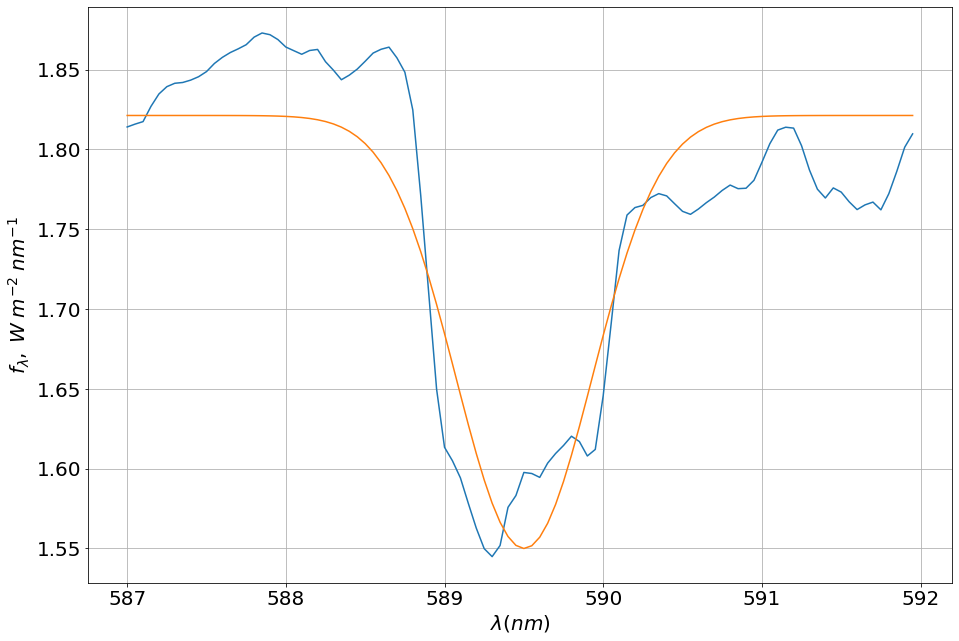

[3.32090126e-01 6.56499346e+02 3.15462601e-01 1.54065302e+00]


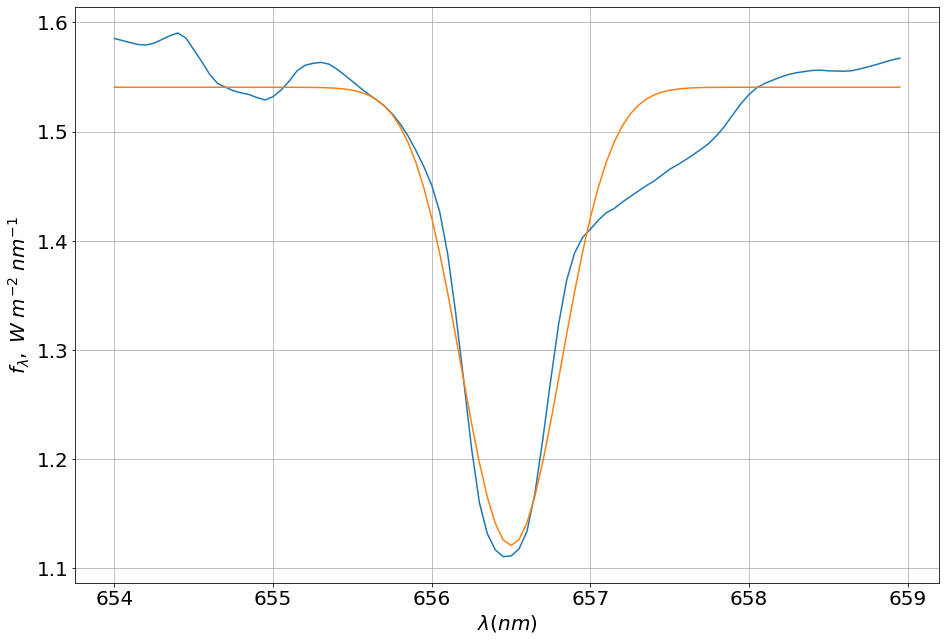

[2.49426433e-01 8.54427267e+02 3.11869442e-01 9.84970310e-01]


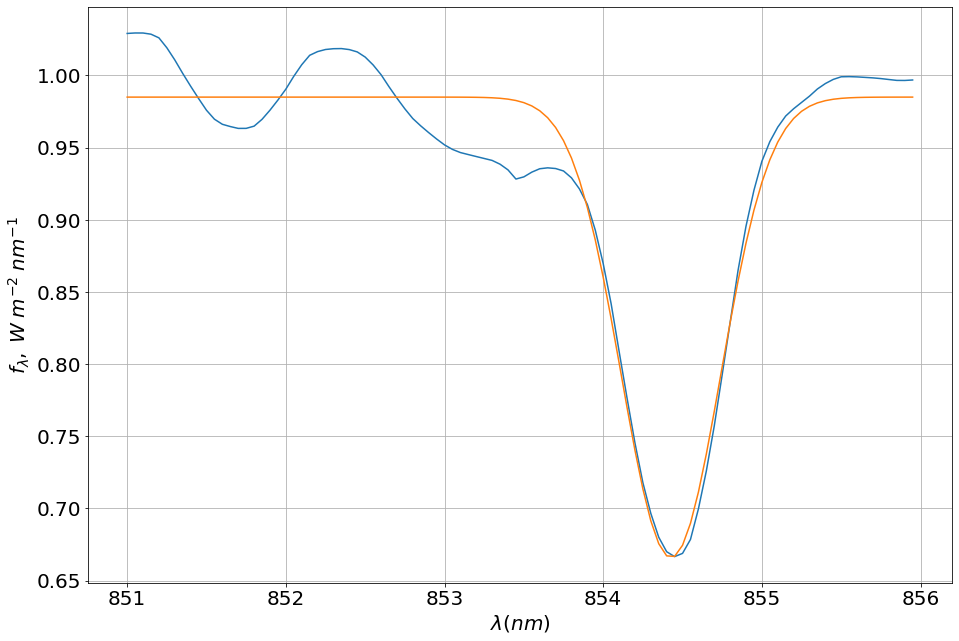

[1.99361174e-01 8.66437176e+02 2.59331052e-01 1.00813122e+00]


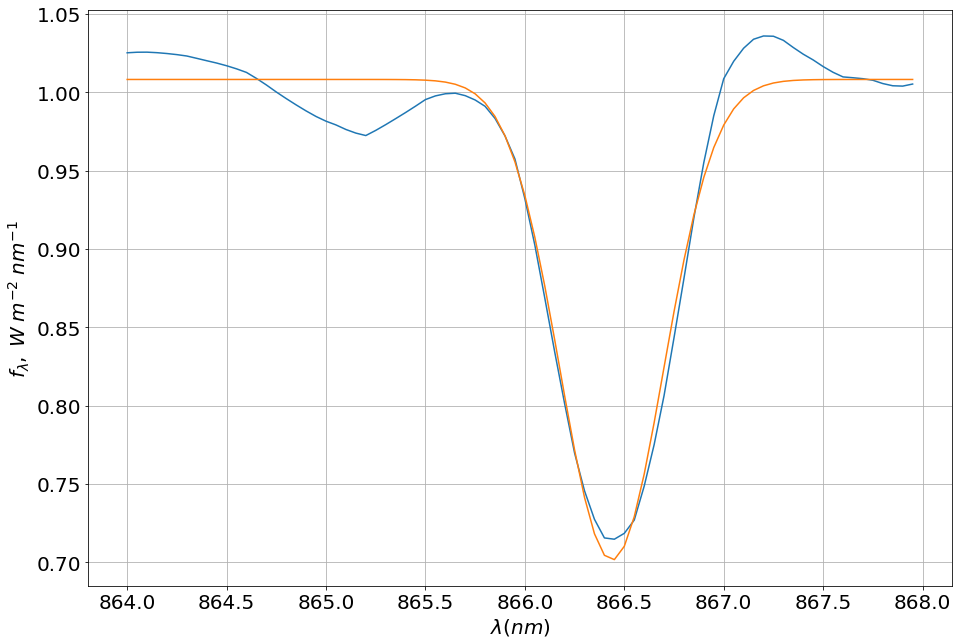

In [5]:
def gaussian_absorption (x, A, mu, sigma, h):
    return h - A * 1/sigma/(2 * np.pi)**0.5 * np.exp(-0.5 * ((x - mu)/sigma)**2)

ranges = np.array([[391, 396], [395, 399], [428, 432], [485, 488], [515, 518], [587, 592], [654, 659], [851, 856], [864, 868]])

wavelength = []
wavelength_uncertainties = []
area = []
area_uncertainties = []
equivalent_width = []
equivalent_width_uncertainties = []

for band in ranges:
    #getting array for specific line
    i = np.where(np.isclose(wavelengths_outside, band[0]))[0][0]
    j = np.where(np.isclose(wavelengths_outside, band[1]))[0][0]
    wavelengths = wavelengths_outside[i:j]
    intensities = flux_densities_outside[i:j]
    
    A_guess = (np.max(intensities) - np.min(intensities)) * (band[1] - band[0]) / 4
    p0 = [1,  (wavelengths_outside[j] + wavelengths_outside[i]) / 2, 
          (wavelengths_outside[j] - wavelengths_outside[i]) / 2, 
          (flux_densities_outside[i] + flux_densities_outside[j]) / 2]
    
    popt, pcov = curve_fit(gaussian_absorption, wavelengths, intensities, p0)
    perr = np.sqrt(np.diag(pcov))
    area.append(popt[0])
    area_uncertainties.append(perr[0])
    wavelength.append(popt[1])
    wavelength_uncertainties.append(perr[1])
   
    A, mu, sigma, h = popt
    A_h_corr_squared = pcov[0][3]
    A_err_squared = pcov[0][0]
    h_err_squared = pcov[3][3]
    W = A/h**2
    W_err = (4 * A**2/h**6 * h_err_squared + 1/h**4 * A_err_squared - 2 * A_h_corr_squared * A/h**5)**0.5
    equivalent_width.append(W)
    equivalent_width_uncertainties.append(W_err)
    
    fitted = gaussian_absorption(wavelengths, A, mu, sigma, h)
    
    print(popt)
    ax = plt.axes([0, 0, 2, 2])
    ax.plot(wavelengths, intensities)
    ax.plot(wavelengths, fitted)
    ax.grid(True)
    fontsize = 20
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.ylabel(r'$f_{\lambda}, \; W \; m^{-2} \; nm^{-1}$', fontsize = fontsize)
    plt.xlabel(r'$\lambda(nm)$', fontsize = fontsize)
    plt.savefig('Solar spectrum comparison.png')
    plt.show()

In [6]:
number_of_lines = len(ranges)

for i in range(number_of_lines):
    print(f'Wavelegth = {wavelength[i]:.2f} +- {wavelength_uncertainties[i]:.2f}, Area = {area[i]:.2f} +- {area_uncertainties[i]:.2f}, Equivalent width = {equivalent_width[i]:.2f} +- {equivalent_width_uncertainties[i]:.2f}')

Wavelegth = 393.48 +- 0.01, Area = 1.58 +- 0.04, Equivalent width = 0.78 +- 0.02
Wavelegth = 396.93 +- 0.01, Area = 1.36 +- 0.05, Equivalent width = 0.57 +- 0.02
Wavelegth = 430.67 +- 0.05, Area = 0.82 +- 0.11, Equivalent width = 0.29 +- 0.04
Wavelegth = 486.28 +- 0.02, Area = 0.33 +- 0.02, Equivalent width = 0.09 +- 0.01
Wavelegth = 517.15 +- 0.02, Area = 0.51 +- 0.03, Equivalent width = 0.14 +- 0.01
Wavelegth = 589.50 +- 0.02, Area = 0.29 +- 0.02, Equivalent width = 0.09 +- 0.01
Wavelegth = 656.50 +- 0.01, Area = 0.33 +- 0.01, Equivalent width = 0.14 +- 0.01
Wavelegth = 854.43 +- 0.01, Area = 0.25 +- 0.01, Equivalent width = 0.26 +- 0.01
Wavelegth = 866.44 +- 0.01, Area = 0.20 +- 0.01, Equivalent width = 0.20 +- 0.01


getting values for curve of growth

In [7]:
equivalent_width = np.array(equivalent_width)
equivalent_width_uncertainties = np.array(equivalent_width_uncertainties)
wavelength = np.array(wavelength)
wavelength_uncertainties = np.array(wavelength_uncertainties)

log_W_lambda = np.log10(equivalent_width/wavelength)
log_W_lambda_err = (equivalent_width_uncertainties**2 / equivalent_width**2 + wavelength_uncertainties**2 / wavelength**2 )**0.5 / np.log(10)

for i in range(number_of_lines):
    print(f'log W/lambda = {log_W_lambda[i]:.2f} +- {log_W_lambda_err[i]:.2f}')

log W/lambda = -2.70 +- 0.01
log W/lambda = -2.84 +- 0.01
log W/lambda = -3.17 +- 0.06
log W/lambda = -3.74 +- 0.03
log W/lambda = -3.56 +- 0.03
log W/lambda = -3.83 +- 0.03
log W/lambda = -3.67 +- 0.02
log W/lambda = -3.52 +- 0.01
log W/lambda = -3.65 +- 0.01


In [8]:
ranges = np.array([[485, 488], [587, 592], [654, 659], [851, 856], [864, 868]])

wavelength = []
wavelength_uncertainties = []
area = []
area_uncertainties = []
equivalent_width = []
equivalent_width_uncertainties = []

for band in ranges:
    #getting array for specific line
    i = np.where(np.isclose(wavelengths_outside, band[0]))[0][0]
    j = np.where(np.isclose(wavelengths_outside, band[1]))[0][0]
    wavelengths = wavelengths_outside[i:j]
    intensities = flux_densities_outside[i:j]
    
    A_guess = (np.max(intensities) - np.min(intensities)) * (band[1] - band[0]) / 4
    p0 = [1,  (wavelengths_outside[j] + wavelengths_outside[i]) / 2, 
          (wavelengths_outside[j] - wavelengths_outside[i]) / 2, 
          (flux_densities_outside[i] + flux_densities_outside[j]) / 2]
    
    popt, pcov = curve_fit(gaussian_absorption, wavelengths, intensities, p0)
    perr = np.sqrt(np.diag(pcov))
    area.append(popt[0])
    area_uncertainties.append(perr[0])
    wavelength.append(popt[1])
    wavelength_uncertainties.append(perr[1])
   
    A, mu, sigma, h = popt
    A_h_corr_squared = pcov[0][3]
    A_err_squared = pcov[0][0]
    h_err_squared = pcov[3][3]
    W = A/h**2
    W_err = (4 * A**2/h**6 * h_err_squared + 1/h**4 * A_err_squared - 2 * A_h_corr_squared * A/h**5)**0.5
    equivalent_width.append(W)
    equivalent_width_uncertainties.append(W_err)
    
equivalent_width = np.array(equivalent_width)
equivalent_width_uncertainties = np.array(equivalent_width_uncertainties)
wavelength = np.array(wavelength)
wavelength_uncertainties = np.array(wavelength_uncertainties)

log_W_lambda = np.log10(equivalent_width/wavelength)
log_W_lambda_err = (equivalent_width_uncertainties**2 / equivalent_width**2 + wavelength_uncertainties**2 / wavelength**2 )**0.5 / np.log(10)

for lower bounds

In [9]:
16 - np.log(wavelength/500)

array([16.02782482, 15.83533082, 15.7276864 , 15.46417672, 15.4502185 ])

In [10]:
log_oscillator_strengths = np.array([np.log10(0.1193), -0.1970, np.log10(0.6407), -0.3650, -0.6200])

In [11]:
log_Nf_lambda500 = np.array([15.09, 14.91, 15.41, 15.49, 15.23])
log_Nf_lambda500_err = np.array([0.07, 0.07, 0.2, 0.02, 0.02])

In [12]:
log_N = log_Nf_lambda500 - log_oscillator_strengths - np.log10(wavelength/500)
log_N_err = (wavelength_uncertainties**2 / (wavelength * np.log(10))**2 + log_Nf_lambda500_err**2)**0.5

In [13]:
elements = ['H_beta', 'Na', 'H_alpha', 'Ca+', 'Ca+']
number_of_elements = len(elements)

print('Column densities of elements')

for i in range(number_of_elements):
    print(f'{elements[i]}: logN = {log_N[i]:.2f} +- {log_N_err[i]:.2f}')

Column densities of elements
H_beta: logN = 16.03 +- 0.07
Na: logN = 15.04 +- 0.07
H_alpha: logN = 15.49 +- 0.20
Ca+: logN = 15.62 +- 0.02
Ca+: logN = 15.61 +- 0.02


# with clouds

1906 1935


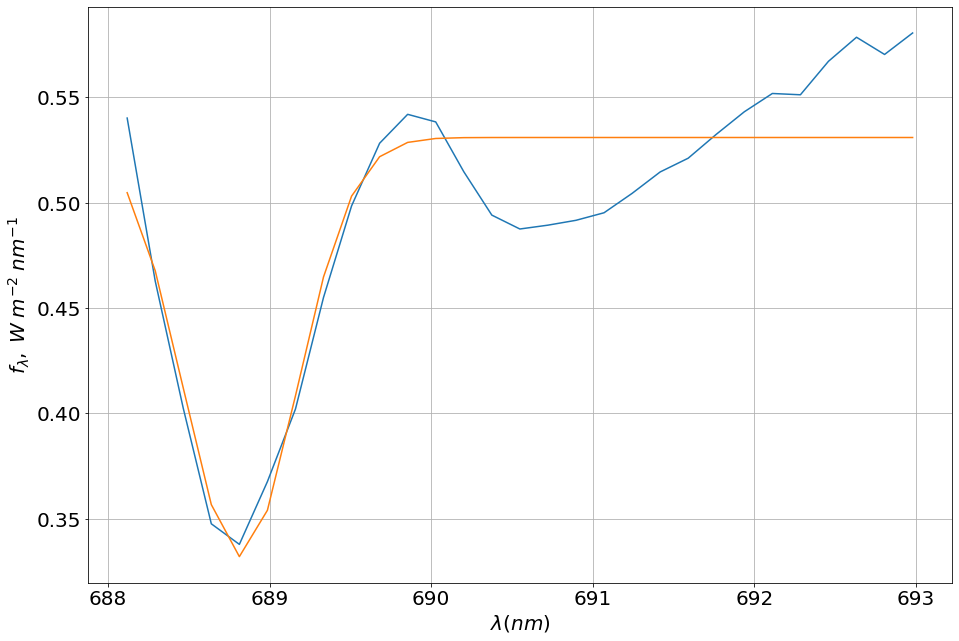

1946 2004


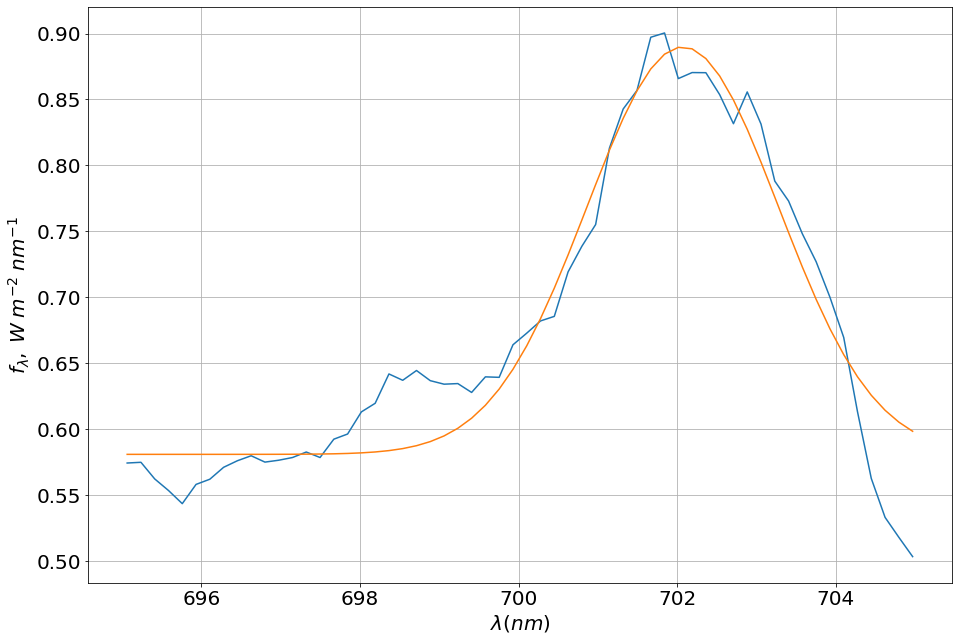

2061 2119


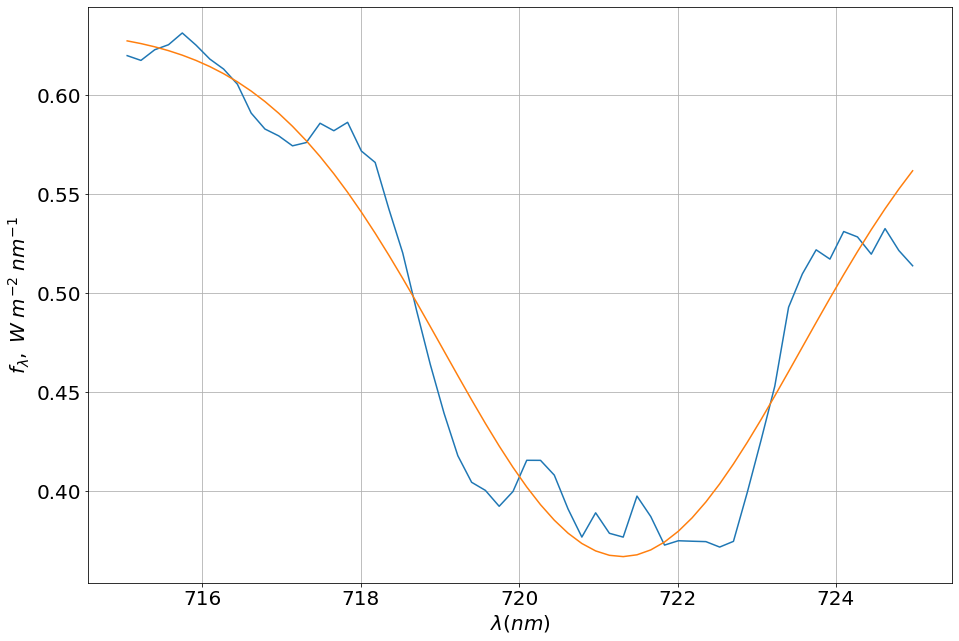

2291 2406


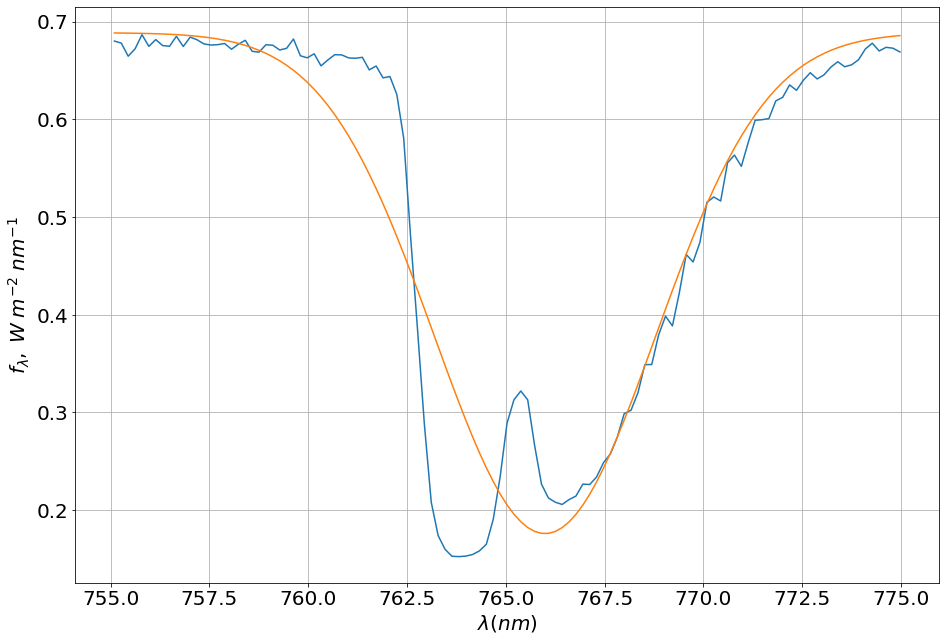

2549 2892


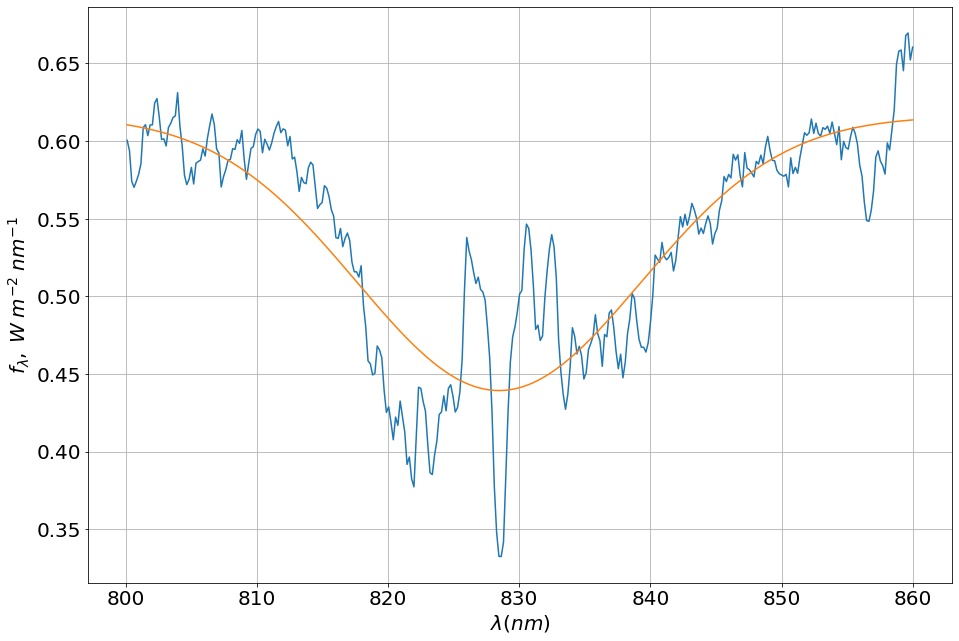

2943 2966


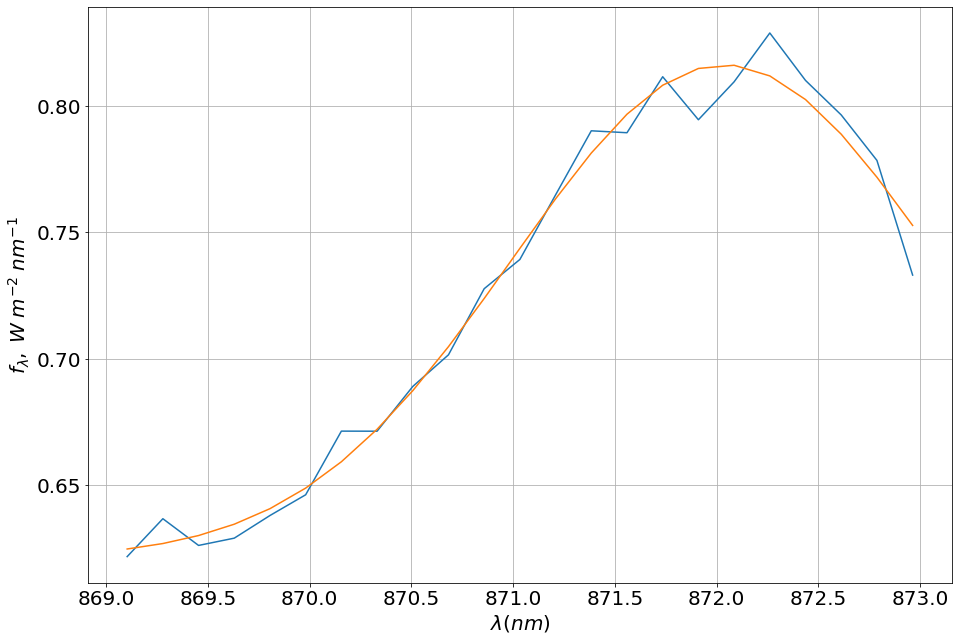

3063 3091


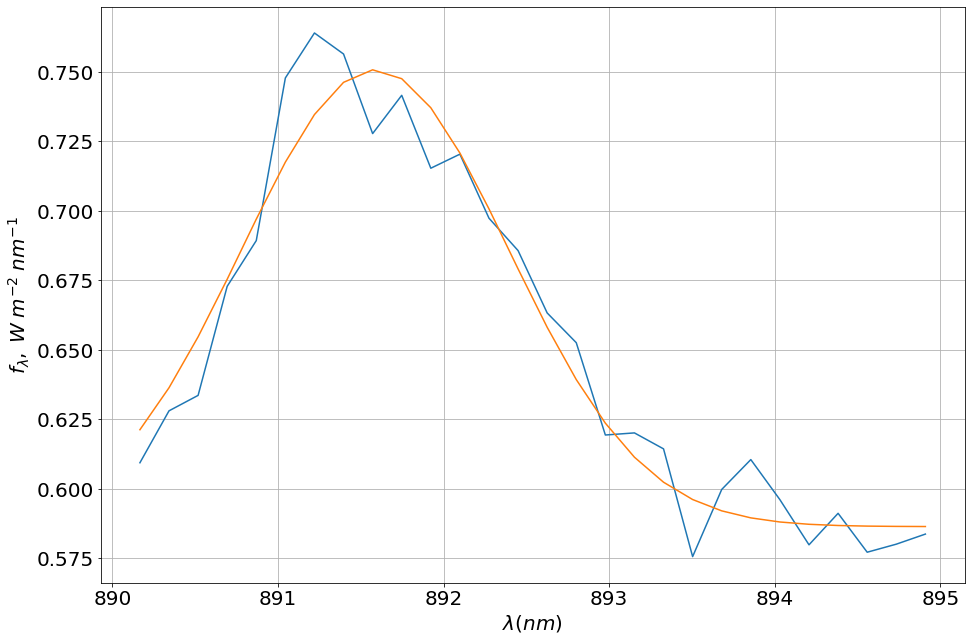

In [14]:
ranges = np.array([[688, 693], [695, 705], [715, 725], [755, 775], [800, 860], [869, 873], [890, 895]])

    

wavelength = []
wavelength_uncertainties = []
area = []
area_uncertainties = []
equivalent_width = []
equivalent_width_uncertainties = []
#wavelengths_clouds, flux_densities_clouds
for band in ranges:
    #getting array for specific line
    i = (wavelengths_clouds > band[0]).nonzero()[0][0]
    j = (wavelengths_clouds > band[1]).nonzero()[0][0]
    print(i, j)
    wavelengths = wavelengths_clouds[i:j]
    intensities = flux_densities_clouds[i:j]
    
    A_guess = np.max(intensities) * (band[1] - band[0]) / 2
    p0 = [A_guess,  (wavelengths_clouds[j] + wavelengths_clouds[i]) / 2, 
          (wavelengths_clouds[j] - wavelengths_clouds[i]) / 2, 
          (flux_densities_clouds[i] + flux_densities_clouds[j]) / 2]
    
    popt, pcov = curve_fit(gaussian_absorption, wavelengths, intensities, p0, maxfev = 1000000)
    perr = np.sqrt(np.diag(pcov))
    area.append(popt[0])
    area_uncertainties.append(perr[0])
    wavelength.append(popt[1])
    wavelength_uncertainties.append(perr[1])
   
    A, mu, sigma, h = popt
    A_h_corr_squared = pcov[0][3]
    A_err_squared = pcov[0][0]
    h_err_squared = pcov[3][3]
    W = A/h**2
    W_err = (4 * A**2/h**6 * h_err_squared + 1/h**4 * A_err_squared - 2 * A_h_corr_squared * A/h**5)**0.5
    equivalent_width.append(W)
    equivalent_width_uncertainties.append(W_err)
    
    fitted = gaussian_absorption(wavelengths, A, mu, sigma, h)
    
    
    ax = plt.axes([0, 0, 2, 2])
    ax.plot(wavelengths, intensities)
    ax.plot(wavelengths, fitted)
    ax.grid(True)
    fontsize = 20
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.ylabel(r'$f_{\lambda}, \; W \; m^{-2} \; nm^{-1}$', fontsize = fontsize)
    plt.xlabel(r'$\lambda(nm)$', fontsize = fontsize)
    plt.savefig('Solar spectrum comparison.png')
    plt.show()

In [15]:
number_of_lines = len(ranges)

print('Absorption lines')
for i in range(number_of_lines):
    if (equivalent_width[i] > 0):
        print(f'Wavelegth = {wavelength[i]:.2f} +- {wavelength_uncertainties[i]:.2f}, Area = {area[i]:.2f} +- {area_uncertainties[i]:.2f}, Equivalent width = {equivalent_width[i]:.2f} +- {equivalent_width_uncertainties[i]:.2f}')
        
print('-----------------------------------------------------------')
print('Emission lines')
for i in range(number_of_lines):
    if (equivalent_width[i] < 0):
        print(f'Wavelegth = {wavelength[i]:.2f} +- {wavelength_uncertainties[i]:.2f}, Area = {-area[i]:.2f} +- {area_uncertainties[i]:.2f}, Equivalent width = {-equivalent_width[i]:.2f} +- {equivalent_width_uncertainties[i]:.2f}')
        

Absorption lines
Wavelegth = 688.82 +- 0.04, Area = 0.17 +- 0.02, Equivalent width = 0.61 +- 0.07
Wavelegth = 721.30 +- 0.06, Area = 1.51 +- 0.12, Equivalent width = 3.77 +- 0.27
Wavelegth = 765.99 +- 0.09, Area = 3.59 +- 0.20, Equivalent width = 7.58 +- 0.39
Wavelegth = 828.46 +- 0.29, Area = 4.79 +- 0.34, Equivalent width = 12.61 +- 0.81
-----------------------------------------------------------
Emission lines
Wavelegth = 702.07 +- 0.05, Area = 0.94 +- 0.06, Equivalent width = 2.78 +- 0.20
Wavelegth = 872.04 +- 0.03, Area = 0.51 +- 0.04, Equivalent width = 1.32 +- 0.11
Wavelegth = 891.59 +- 0.04, Area = 0.33 +- 0.03, Equivalent width = 0.97 +- 0.08


In [16]:
equivalent_width = np.abs(np.array(equivalent_width))
wavelength = np.array(wavelength)
equivalent_width_uncertainties = np.array(equivalent_width_uncertainties)
wavelength_uncertainties = np.array(wavelength_uncertainties)
log_W_lambda = np.log10(equivalent_width/wavelength)
log_W_lambda_err = (equivalent_width_uncertainties**2 / equivalent_width**2 + wavelength_uncertainties**2 / wavelength**2 )**0.5 / np.log(10)
for i in range(number_of_lines):
    print(f'log W/lambda = {log_W_lambda[i]:.2f} +- {log_W_lambda_err[i]:.2f}')

log W/lambda = -3.05 +- 0.05
log W/lambda = -2.40 +- 0.03
log W/lambda = -2.28 +- 0.03
log W/lambda = -2.00 +- 0.02
log W/lambda = -1.82 +- 0.03
log W/lambda = -2.82 +- 0.04
log W/lambda = -2.96 +- 0.04


In [17]:
16 - np.log(wavelength/500)

array([15.67963079, 15.66057423, 15.63355328, 15.57343373, 15.49503963,
       15.44377458, 15.42160529])